# Visualizing ROMS Output

In [1]:
from roms_tools import Grid, ROMSOutput

We first read some ROMS data. For more details on reading ROMS data, see [this notebook](https://roms-tools.readthedocs.io/en/latest/reading_roms_output.html).

In [2]:
grid = Grid.from_file(
    "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/epac25km_grd.nc"
)

WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


In [3]:
roms_output = ROMSOutput(
    grid=grid,
    path=[
        "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac25km_rst.19980106000000.nc",
        "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac25km_rst.19990201000000.nc",
    ],
    use_dask=True,
)

We can plot our ROMS data on
1. its **native** dimensions (`s`, `eta` , `xi`)
2. **lat/lon/depth** coordinates
3. a combination of 1. and 2.

We will demonstrate these three cases below.

## Plotting on the native model grid

Let's visualize our ROMS model output on its native grid. To start, here is a depiction of the horizontal grid, highlighting the two horizontal dimensions: `eta` ($\eta$) and `xi` ($\xi$).

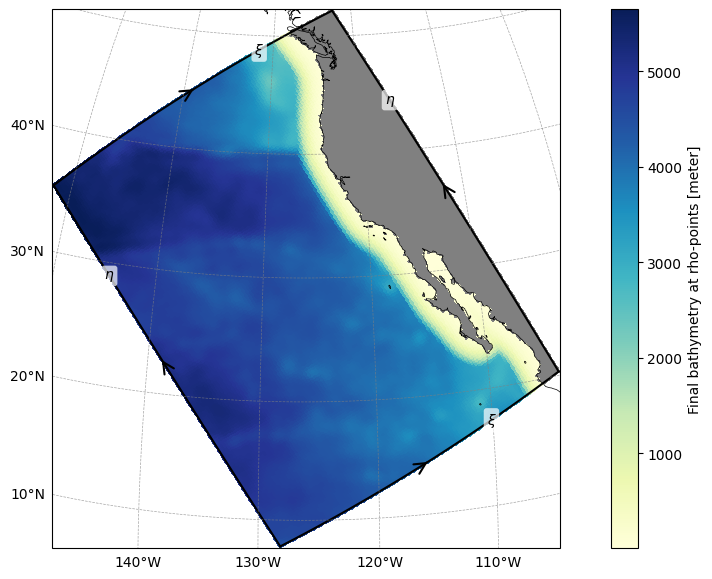

In [4]:
grid.plot(with_dim_names=True)

To plot ROMS output on its native grid, we can specify horizontal or vertical slices by specifying combinations of (`eta`, `xi`, `s`)—the three primary dimensions in ROMS.

To see ROMS outputs available for plotting, use `roms_output.ds`.

First, let's plot the surface pH at the earliest available time step. We define a horizontal slice by setting the `s` parameter.

[########################################] | 100% Completed | 101.07 ms


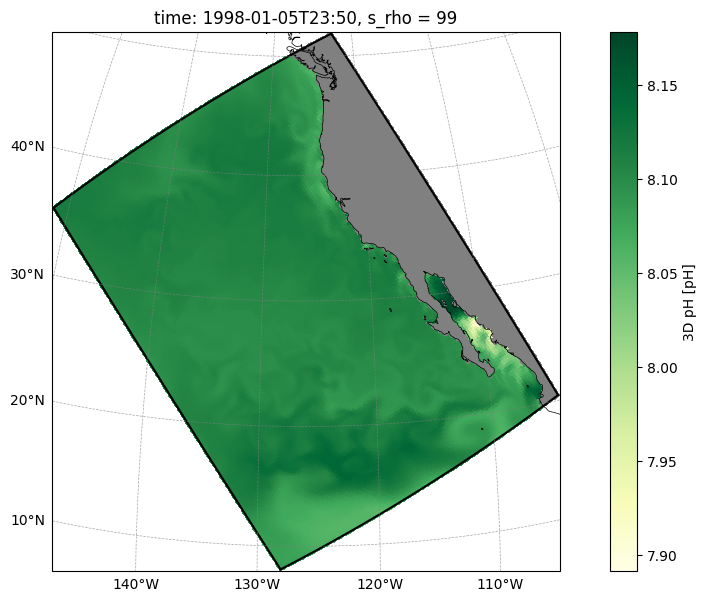

In [5]:
roms_output.plot("MARBL_PH_3D", time=0, s=-1)

Now we plot DIC at the surface at the 2nd available time step.

[########################################] | 100% Completed | 201.59 ms


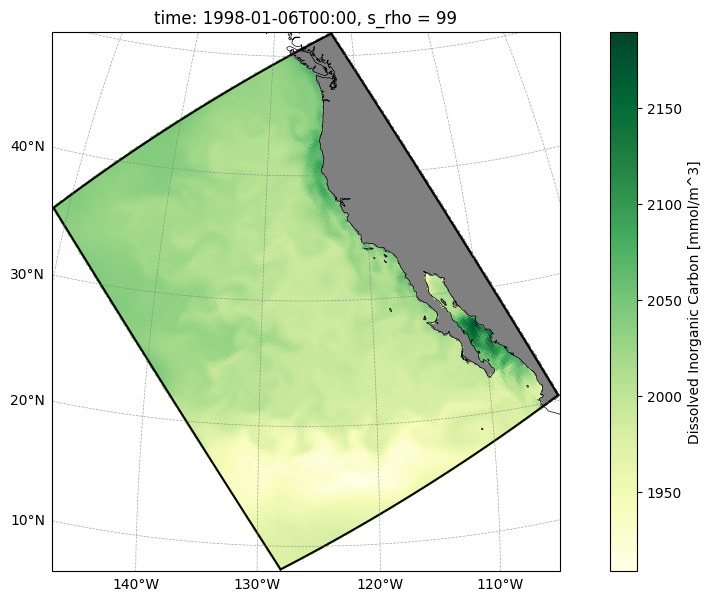

In [6]:
roms_output.plot("DIC", time=1, s=-1)

We can also plot the bottom layer. Note that the bottom layer spans many different depths as shown by the depth contours.

[########################################] | 100% Completed | 101.05 ms


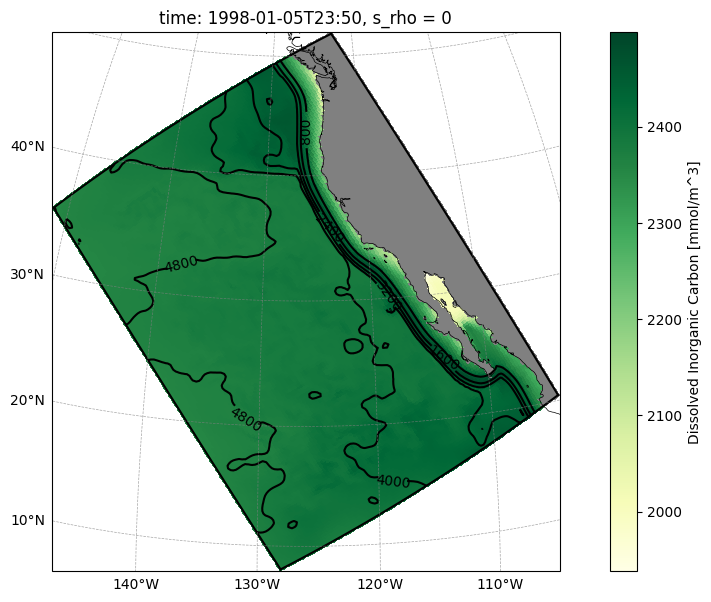

In [7]:
roms_output.plot("DIC", time=0, s=0, depth_contours=True)

Next, we slice along the `eta` dimension.

[########################################] | 100% Completed | 100.92 ms


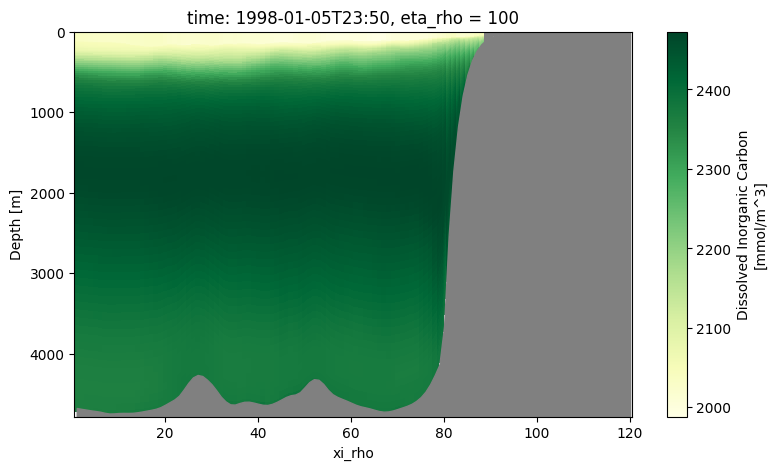

In [8]:
roms_output.plot("DIC", time=0, eta=100)

Here is a plot of zonal velocity, sliced along the `xi` dimension.

[########################################] | 100% Completed | 100.90 ms


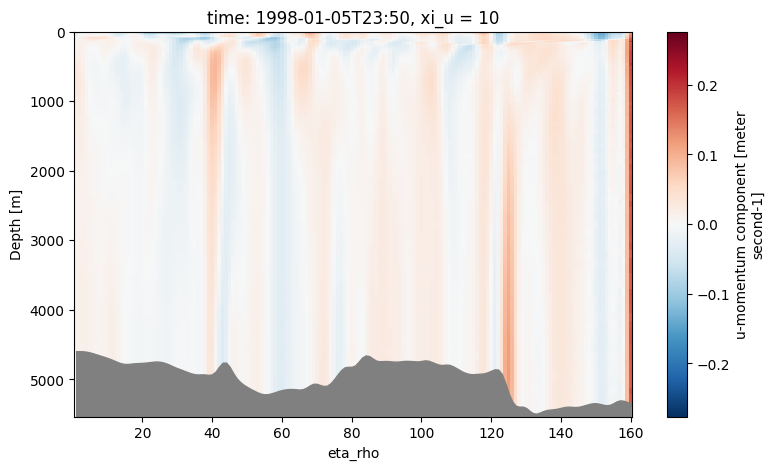

In [9]:
roms_output.plot("u", time=0, xi=10)

Or we can look at the depth profile of our favorite variable, this time sliced along both horizontal dimensions of the ROMS native grid, `eta` and `xi`.

[########################################] | 100% Completed | 100.77 ms


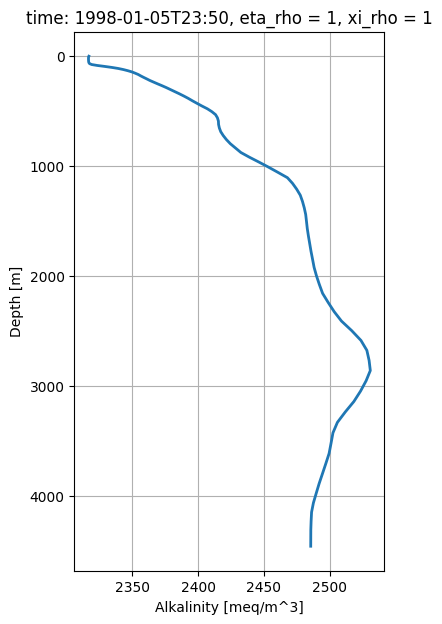

In [10]:
roms_output.plot("ALK", time=0, xi=1, eta=1)

We can also plot the spatial variability of alkalinity (or any other variable) for a specified layer `s` and a specified `eta` slice.

[########################################] | 100% Completed | 101.08 ms


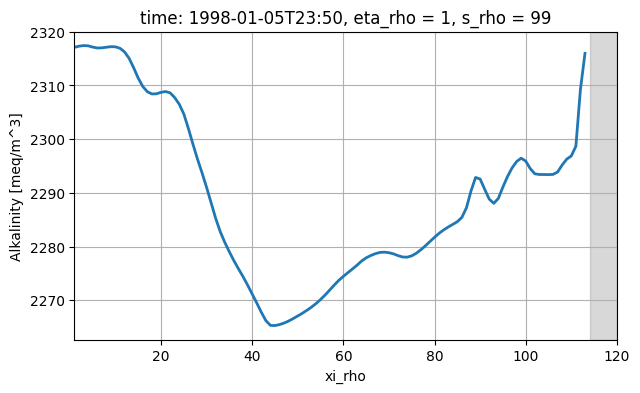

In [11]:
roms_output.plot("ALK", time=0, s=-1, eta=1)

Or we specify a layer `s` and a `xi` slice.

[########################################] | 100% Completed | 101.02 ms


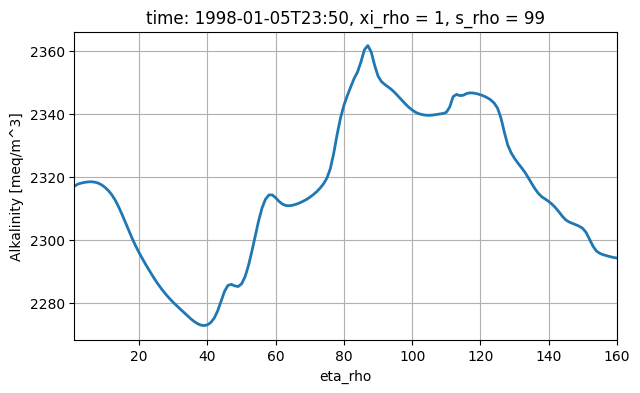

In [12]:
roms_output.plot("ALK", time=0, s=-1, xi=1)

## Plotting in lat/lon/depth coordinates

Let's now make a few plots in lat/lon/depth coordinates.

First we plot alkalinity at a 1000m depth.

[########################################] | 100% Completed | 100.92 ms


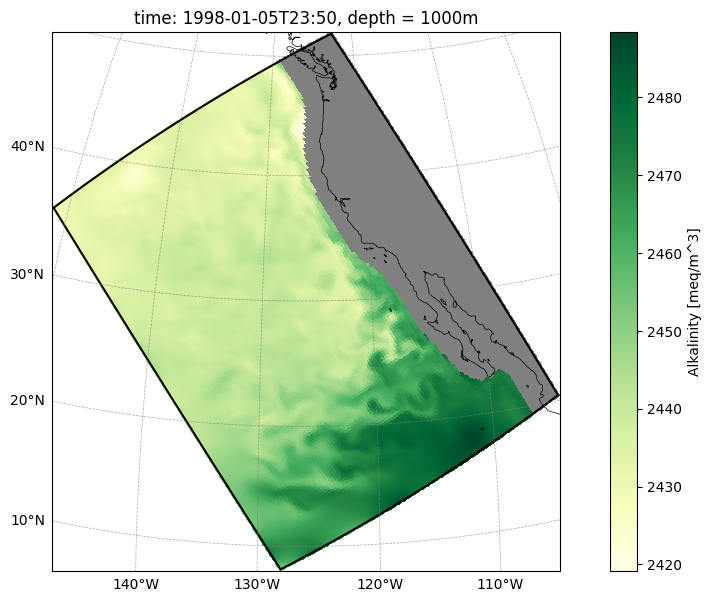

In [13]:
roms_output.plot("ALK", time=0, depth=1000)

Here is a section of alkalinity along a fixed latitude of 20°N.

[########################################] | 100% Completed | 101.66 ms


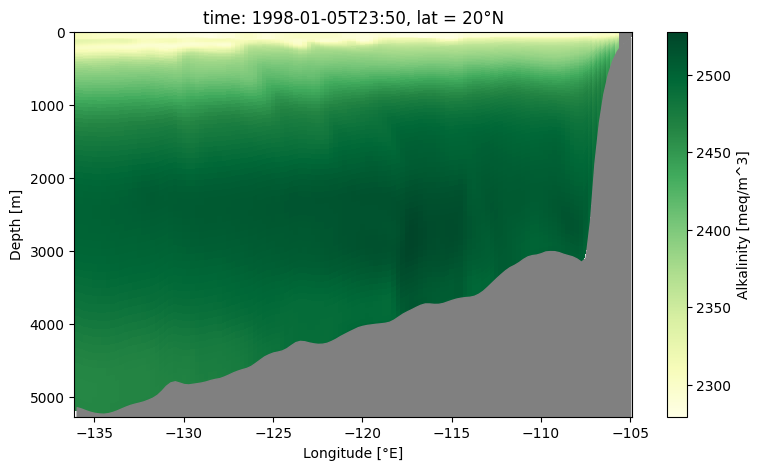

In [14]:
roms_output.plot("ALK", time=0, lat=20)

And here we plot along a fixed longitude of 120°W.

[########################################] | 100% Completed | 101.25 ms


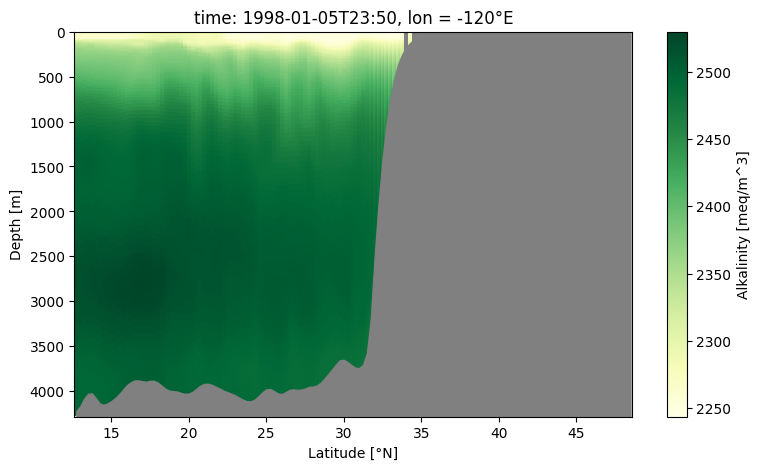

In [15]:
roms_output.plot("ALK", time=0, lon=-120)

We can also plot a vertical profile at a specified lat/lon location.

[########################################] | 100% Completed | 100.98 ms


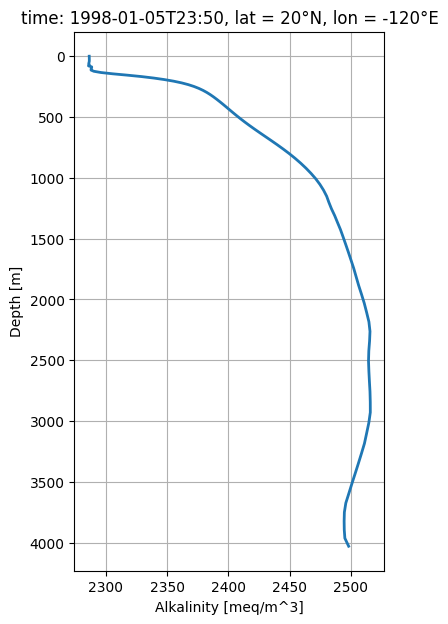

In [16]:
roms_output.plot("ALK", time=0, lat=20, lon=-120)

Or we plot at a fixed latitude and a fixed depth.

[########################################] | 100% Completed | 101.10 ms


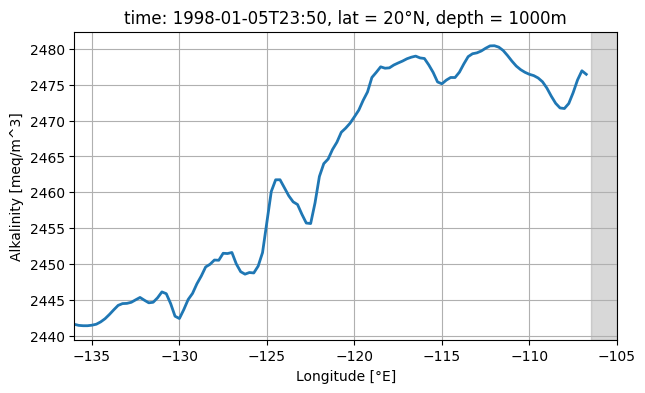

In [17]:
roms_output.plot("ALK", time=0, lat=20, depth=1000)

## Plotting in native and lat/lon/depth coordinates combined

Now we will use a combination of native dimensions and lat/lon/depth coordinates. However, note that

* the horizontal native dimensions `eta` and `xi` **cannot be combined** with the horizontal coordinates `lat` and `lon`
* the vertical native dimension `s` **cannot be combined** with the vertical coordinate `depth`.

In the next two plots we combine a horizontal lat/lon coordinate with the native vertical dimension `s`.

[########################################] | 100% Completed | 101.16 ms


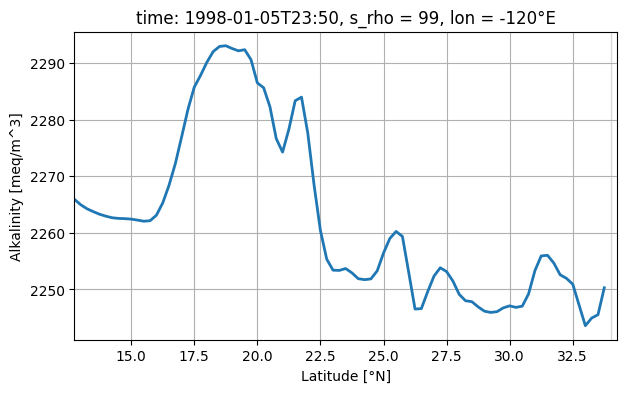

In [18]:
roms_output.plot("ALK", time=0, lon=-120, s=-1)

[########################################] | 100% Completed | 100.98 ms


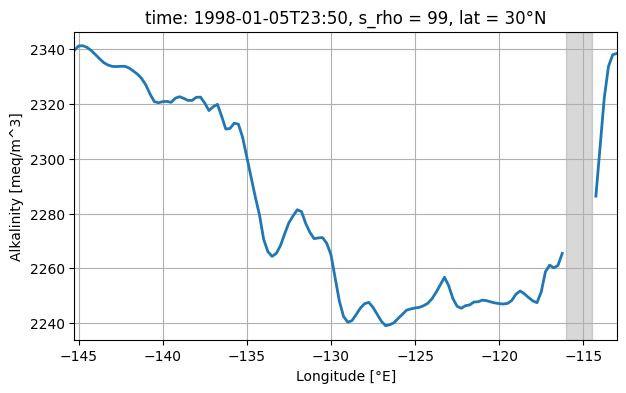

In [19]:
roms_output.plot("ALK", time=0, lat=30, s=-1)

In the next two plots we combine a horizontal native dimension with a depth coordinate.

[########################################] | 100% Completed | 101.16 ms


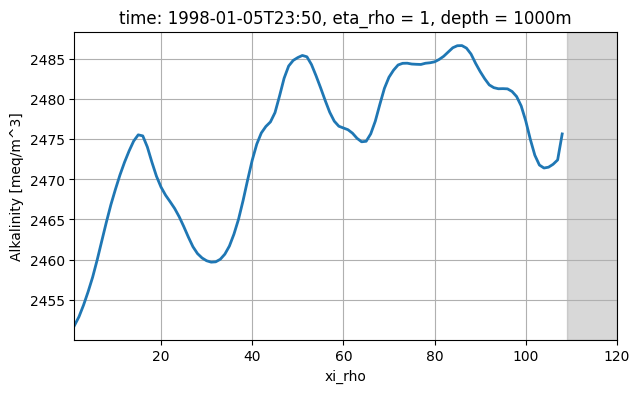

In [20]:
roms_output.plot("ALK", time=0, eta=1, depth=1000)

[########################################] | 100% Completed | 101.40 ms


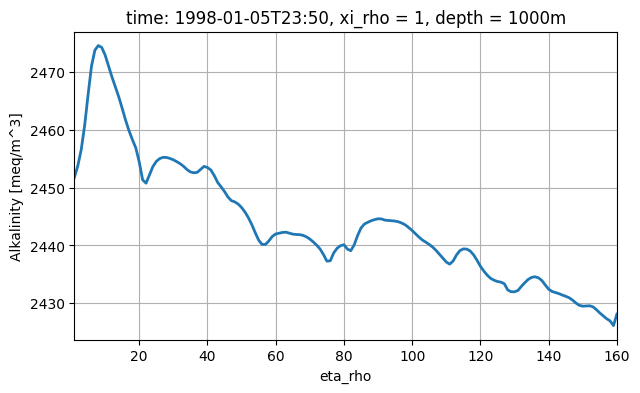

In [21]:
roms_output.plot("ALK", time=0, xi=1, depth=1000)

## Handling the Horizontal Boundary

The `ROMSOutput.plot()` method includes a parameter `include_boundary`, which controls whether the outermost grid cells along the `eta`- and `xi`-boundaries are included in the plot. In diagnostic ROMS output fields, these boundary cells are often set to zero, so excluding them can improve visualization.  

By default, `include_boundary = False`, but we can set `include_boundary = True` to include the boundary cells in the plot.

Let's plot the PH field, which is a diagnostic variable. The effect of these zeros along the horizontal boundary becomes evident in the next two plots.

[########################################] | 100% Completed | 100.91 ms


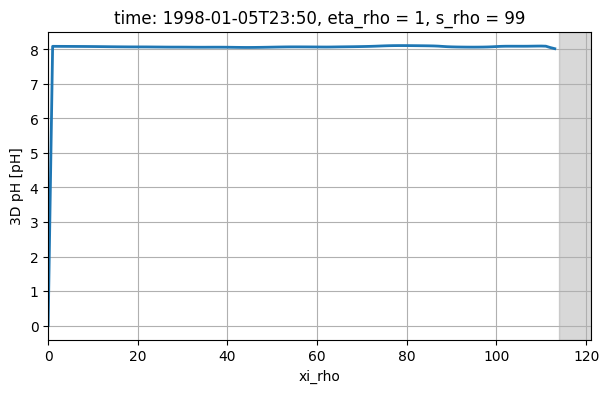

In [22]:
roms_output.plot("MARBL_PH_3D", time=0, s=-1, eta=1, include_boundary=True)

The plot above confirms that the value at `xi = 0` is zero.

Next, let's plot the western boundary of the PH field by slicing along `eta = 0`. This boundary consists entirely of zeros.

[########################################] | 100% Completed | 100.97 ms


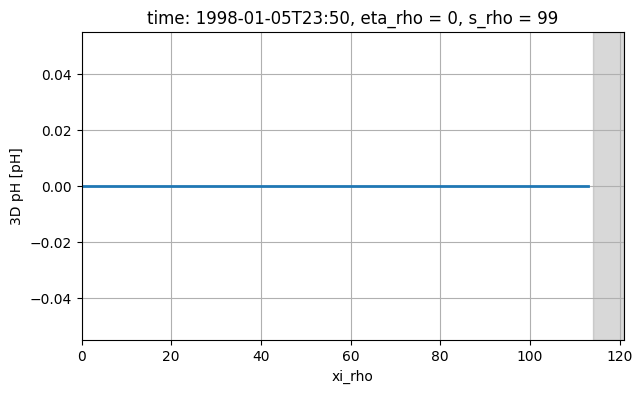

In [23]:
roms_output.plot("MARBL_PH_3D", time=0, s=-1, eta=0, include_boundary=True)

Including the horizontal boundary for prognostic fields can lead to plots that are hard to read, as confirmed in the following.

[########################################] | 100% Completed | 100.94 ms


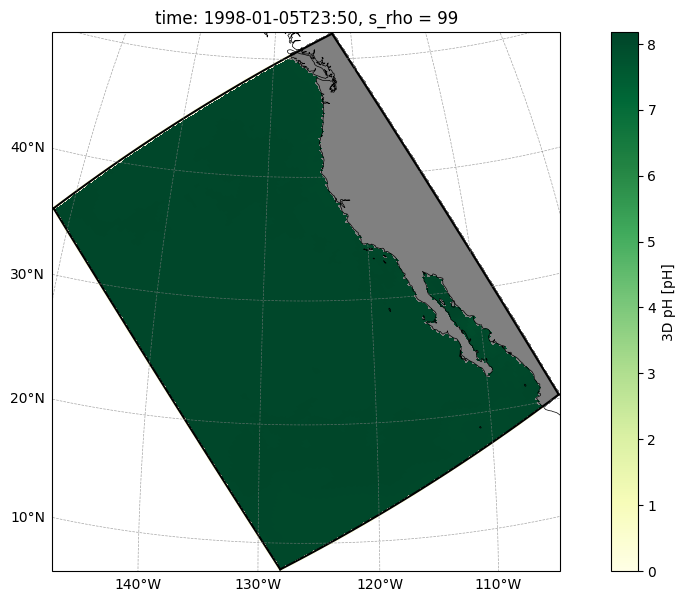

In [24]:
roms_output.plot("MARBL_PH_3D", time=0, s=-1, include_boundary=True)

In the plot above, the colorbar extends down to zero due to a narrow band of zeros, one grid cell wide, along the boundary (although it is barely visible). This skewed colorbar makes it difficult to discern any features in the interior of the field. 

When excluding the horizontal boundary, this problem is resolved, and the plot becomes much clearer.

[########################################] | 100% Completed | 101.04 ms


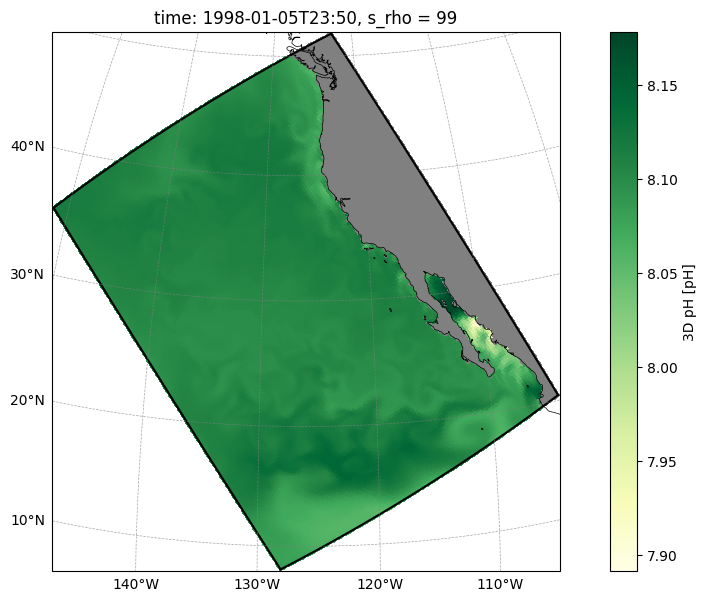

In [25]:
roms_output.plot("MARBL_PH_3D", time=0, s=-1, include_boundary=False)

Note that you cannot exclude the horizontal boundary and request to plot the horizontal boundary at the same time. Doing so will result in an error.

In [26]:
roms_output.plot("MARBL_PH_3D", time=0, s=-1, eta=0, include_boundary=False)

[########################################] | 100% Completed | 101.07 ms


ValueError: Invalid eta index: 0 lies on the boundary, which is excluded when `include_boundary = False`. Either set `include_boundary = True`, or adjust eta to avoid boundary values.

## Saving a Plot

If you want to save a figure, you can specify the path using the `save_path` parameter when calling the `.plot` method.

[########################################] | 100% Completed | 101.34 ms


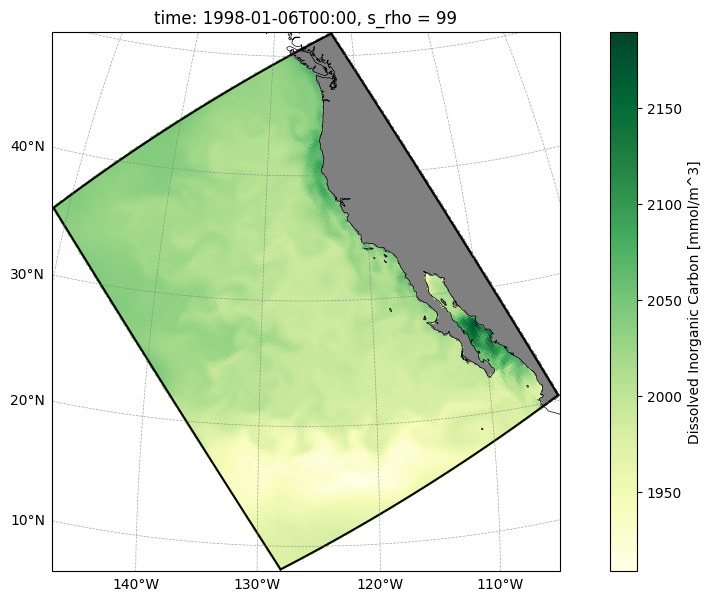

In [27]:
roms_output.plot("DIC", time=1, s=-1, save_path="figures/surface_DIC.png")